In [136]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

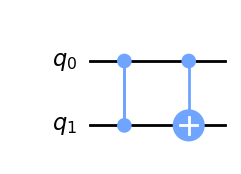

In [137]:
qc=QuantumCircuit(2,name='oracle')
qc.cz(0,1)
qc.cx(0,1)
qc.to_gate()
qc.draw(output="mpl")

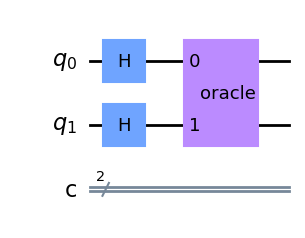

In [138]:
backend=Aer.get_backend('statevector_simulator')
grover_circuit=QuantumCircuit(2,2)# (quantumregister,classicalregister)

grover_circuit.h([0,1])# superpostion of all possible state

grover_circuit.append(qc,[0,1])
grover_circuit.draw(output="mpl")

In [139]:
job=execute(grover_circuit,backend)
result=job.result()

In [140]:
statevector=result.get_statevector()
np.around(statevector,2)

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j])

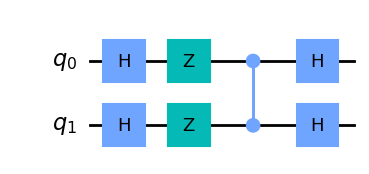

In [141]:
ref=QuantumCircuit(2,name='reflection')
ref.h([0,1])
ref.z([0,1])
ref.cz(0,1)
ref.h([0,1])
ref.to_gate()
ref.draw(output='mpl')

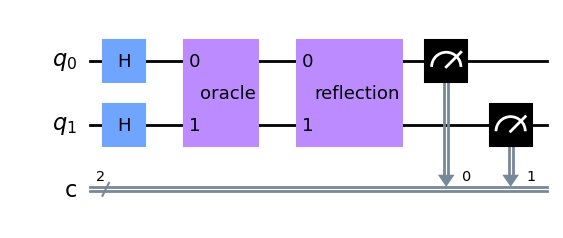

In [142]:
backend=Aer.get_backend('qasm_simulator')
#circuit for measuring |11> state
grover_circ=QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(qc,[0,1])
grover_circ.append(ref,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw(output='mpl')

In [143]:
job=execute(grover_circ,backend,shots=1000)
job.result().get_counts()

{'01': 1000}